In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [145]:
start = '2000-01-01'
end = '2022-11-01'

df = data.DataReader('TSLA','yahoo',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,1.666667,1.169333,1.266667,1.592667,281494500.0,1.592667
2010-06-30,2.028000,1.553333,1.719333,1.588667,257806500.0,1.588667
2010-07-01,1.728000,1.351333,1.666667,1.464000,123282000.0,1.464000
2010-07-02,1.540000,1.247333,1.533333,1.280000,77097000.0,1.280000
2010-07-06,1.333333,1.055333,1.333333,1.074000,103003500.0,1.074000


In [146]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-10-26,230.600006,218.199997,219.399994,224.639999,85012500.0,224.639999
2022-10-27,233.809998,222.850006,229.770004,225.089996,61638800.0,225.089996
2022-10-28,228.860001,216.350006,225.399994,228.520004,69152400.0,228.520004
2022-10-31,229.850006,221.940002,226.190002,227.539993,61554300.0,227.539993
2022-11-01,237.399994,227.279999,234.050003,227.820007,62688800.0,227.820007


In [147]:
df=df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-06-29,1.666667,1.169333,1.266667,1.592667,281494500.0,1.592667
1,2010-06-30,2.028000,1.553333,1.719333,1.588667,257806500.0,1.588667
2,2010-07-01,1.728000,1.351333,1.666667,1.464000,123282000.0,1.464000
3,2010-07-02,1.540000,1.247333,1.533333,1.280000,77097000.0,1.280000
4,2010-07-06,1.333333,1.055333,1.333333,1.074000,103003500.0,1.074000


In [148]:
df.rename(columns = {"Date" : "date", "Open" : "open", "High" : "high", "Low" : "low","Close" : "close", "Volume" : "volume", "Adj Close" : "adj close"}, inplace = True)
#renaming the data frame columns to lower case

In [149]:
df.columns

Index(['date', 'high', 'low', 'open', 'close', 'volume', 'adj close'], dtype='object')

In [150]:
df = df.drop(['date','adj close'], axis =1)

In [151]:
df.head()

,high,low,open,close,volume
0,1.666667,1.169333,1.266667,1.592667,281494500.0
1,2.028000,1.553333,1.719333,1.588667,257806500.0
2,1.728000,1.351333,1.666667,1.464000,123282000.0
3,1.540000,1.247333,1.533333,1.280000,77097000.0
4,1.333333,1.055333,1.333333,1.074000,103003500.0


In [152]:
df.shape

(3109, 5)

In [197]:
data_training = pd.DataFrame(df['close'][0:int(len(df)*0.80)])
data_testing = pd.DataFrame(df['close'][int(len(df)*0.80): int(len(df))])

In [198]:
print(data_training.shape)
print(data_testing.shape)

(2487, 1)
(622, 1)


In [199]:
data_training.head()

,close
0,1.592667
1,1.588667
2,1.464000
3,1.280000
4,1.074000


In [200]:
data_testing.head()

,close
2487,53.278000
2488,54.242001
2489,53.867332
2490,54.370667
2491,55.173332


In [201]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [202]:
data_training_array = scaler.fit_transform(data_training) 

In [203]:
data_testing.shape

(622, 1)

In [204]:
data_training_array.shape

(2487, 1)

In [205]:
x_train =[]
y_train =[]

In [206]:
for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
#x_train
#y_train

In [207]:
x_train, ytrain = np.array(x_train), np.array(y_train)

In [208]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,LSTM

In [209]:
m_2 = Sequential()
m_2.add(LSTM(units = 50,activation='relu',return_sequences =True,
              input_shape=(x_train.shape[1],1)))
m_2.add(Dropout(0.2))


m_2.add(LSTM(units = 60,activation='relu',return_sequences =True))
m_2.add(Dropout(0.3))


m_2.add(LSTM(units = 80,activation='relu',return_sequences =True))
m_2.add(Dropout(0.4))


m_2.add(LSTM(units = 120,activation='relu',return_sequences =False))
m_2.add(Dropout(0.5))

m_2.add(Dense(units = 1))

In [255]:
m_2.compile(optimizer='adam',loss='mean_squared_error')
m_2.fit(x_train,ytrain, epochs=2)
print(m_2.summary())

Epoch 1/2
75/75 [==============================] - 23s 239ms/step - loss: 0.0042
Epoch 2/2
75/75 [==============================] - 19s 260ms/step - loss: 0.0039
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 100, 50)           10400     
                                                                 
 dropout_12 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_13 (LSTM)              (None, 100, 60)           26640     
                                                                 
 dropout_13 (Dropout)        (None, 100, 60)           0         
                                                                 
 lstm_14 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_14 (Dropout)   

In [211]:
#m_2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [256]:
m_2.save('keras_model_SDAI_1.h5')

In [257]:
data_testing.head()

,close
2487,53.278000
2488,54.242001
2489,53.867332
2490,54.370667
2491,55.173332


In [258]:
past_100_days = data_training.tail(100)

In [259]:
final_df = past_100_days.append(data_testing,ignore_index=True)

C:\Users\yashz\AppData\Local\Temp\ipykernel_17232\3976939425.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing,ignore_index=True)


In [260]:
final_df.head()

,close
0,27.039333
1,27.948000
2,28.350000
3,28.729334
4,28.691999


In [261]:
input_data = scaler.fit_transform(final_df)
#input_data

In [262]:
input_data.shape

(722, 1)

In [263]:
x_test =[]
y_test = []

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [264]:
x_test,y_test = np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(622, 100, 1)
(622,)


In [265]:
y_predicted = m_2.predict(x_test)

20/20 [==============================] - 2s 74ms/step


In [266]:
y_predicted.shape

(622, 1)

In [267]:
y_test.shape

(622,)

In [268]:
sc = scaler.scale_

In [269]:
scale_factor = 1/sc[0]

In [270]:
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

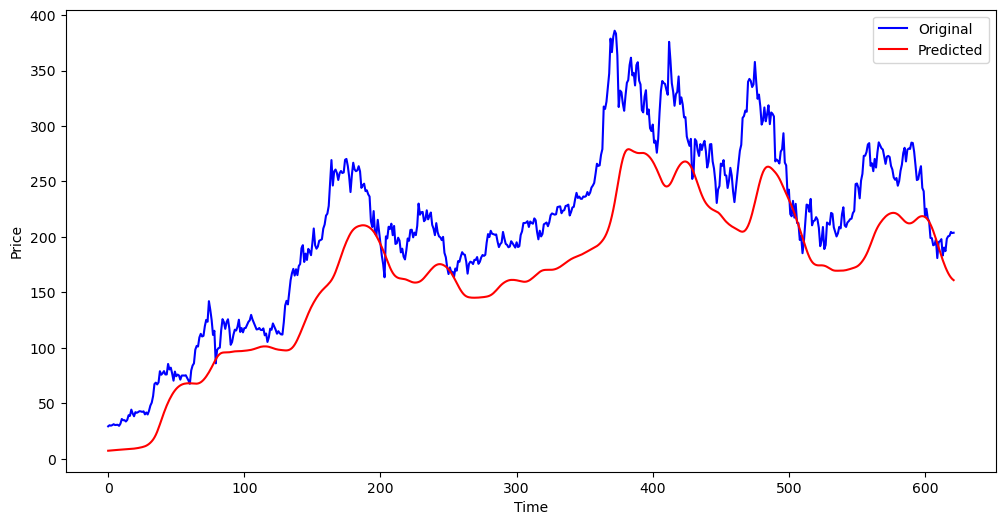

In [271]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b', label = 'Original')
plt.plot(y_predicted,'r', label = 'Predicted')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [233]:
predictions = m_2.predict(x_test)
predictions = scaler.inverse_transform(predictions)
predictions[0:10]

20/20 [==============================] - 2s 76ms/step


array([[46.492397],
       [47.52729 ],
       [48.516434],
       [49.45619 ],
       [50.3455  ],
       [51.18621 ],
       [51.979256],
       [52.724567],
       [53.421535],
       [54.06842 ]], dtype=float32)

In [234]:
predictions.shape

(622, 1)

In [235]:
# converting categorical variables in y_train to numerical variables
y_train_dummies = pd.get_dummies(y_train).values
print('Shape of Label tensor: ', y_train_dummies.shape)

Shape of Label tensor:  (2387, 2217)


In [236]:
y_test_dummies = pd.get_dummies(y_test).values
print('Shape of Label tensor: ', y_test_dummies.shape)

Shape of Label tensor:  (622, 620)


In [237]:
x_train.shape

(2387, 100, 1)

In [238]:
ytrain.shape

(2387,)

In [239]:
data = df.filter(['close'])
data

,close
0,1.592667
1,1.588667
2,1.464000
3,1.280000
4,1.074000
...,...
3104,224.639999
3105,225.089996
3106,228.520004
3107,227.539993


In [240]:
dataset = data.values

In [241]:
training_data_len = int(np.ceil( len(dataset) * .80 ))-1
print("Training data length: ", training_data_len)

Training data length:  2487


In [242]:
from sklearn.model_selection import train_test_split
df['target'] = np.where(df['close'].shift(-1) > df['close'], 1, 0)

features = df[['close']]
target = df['target']
 
#scaler = StandardScaler()
features = scaler.fit_transform(features)
 
X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.2, random_state=2022)
print(X_train.shape, X_valid.shape)

(2487, 1) (622, 1)


In [244]:
#m_2.fit(x_train, y_train_dummies, epochs=5, batch_size=32)

Epoch 1/5
75/75 [==============================] - 20s 220ms/step - loss: 0.0030
Epoch 2/5
75/75 [==============================] - 18s 236ms/step - loss: 4.5641e-04
Epoch 3/5
75/75 [==============================] - 19s 248ms/step - loss: 4.5407e-04
Epoch 4/5
75/75 [==============================] - 18s 239ms/step - loss: 4.5290e-04
Epoch 5/5
75/75 [==============================] - 17s 233ms/step - loss: 4.5227e-04


In [280]:
# model evaluation
from keras.models import load_model

m_2 = load_model('keras_model_SDAI_1.h5')
scores_train = (m_2.evaluate(x_train, y_train_dummies))
scores_test = (m_2.evaluate(x_test, y_test_dummies))

accuracy_train = scores_train
accuracy_test = scores_test 

print("Sequential()")
print("Training Accuracy = ", accuracy_train)
print("Testing Accuracy = " ,accuracy_test)

Sequential()
Training Accuracy =  0.5155958337918579
Testing Accuracy =  0.4991671229467397


In [273]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

models_acc = [LogisticRegression(), SVC(kernel='poly', probability=True), XGBClassifier()]
 
for i in range(3):
    models_acc[i].fit(X_train, Y_train)
    print(f'{models_acc[i]} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(Y_train, models_acc[i].predict_proba(X_train)[:,1]))
    print('Validation Accuracy : ', metrics.roc_auc_score(Y_valid, models_acc[i].predict_proba(X_valid)[:,1]))
    print()


LogisticRegression() : 
Training Accuracy :  0.5055958337918579
Validation Accuracy :  0.4871671229467397

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.5055958337918579
Validation Accuracy :  0.4871671229467397

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...) : 
Training Accuracy :  0.8217942659615098
Validation Ac